Import Library

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats #istatistiksel islemlerde
from scipy.stats import norm,skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone


#warning
import warnings
warnings.filterwarnings('ignore')


Problem Description:Aracların Yakıt Tuketiminin Tahmin Edilmesi.
Aracların özelliklerine göre yakıt tüketimleri farklılık gösterebilir.


Dataset:UCI(California University) Machine Learning Repository

Attribute Information
   1. mpg:
   (100 km de ne kadar benzin yaktigi)
   Ingiltere ve Amerikada km degil mile kullanılıyor ve galon olarak adlandırılıyor.
   2. cylinders:
   Motor icerisinde bulunan silindir sayisi 4-8 arasında degisiyor.
   3. displacement:
   Motorun icerisindeki motor inci
   4. horsepower:
   Motorun beygir gucu
   5. weight:
   Arac agırlıgı pount olarak kg degil
   6. acceleration:
   Aracın ne kadar surede hızlanabildigi.
   7. model year:
   Aracın ne zaman uretildigi
   8. origin:
   Aracin kokeni sırasıyla Amerika, Avrupa, Japonca
   9. car name:
   Araclarin isimleri  

Import Data

In [7]:
column_name=["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","Origin"]
data = pd.read_csv("auto-mpg.data", names=column_name, na_values= "?", comment="\t", sep =" ", skipinitialspace =True)
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [8]:
data= data.rename(columns = {"MPG":"target"})
print("Data shape: ",data.shape)
#398 satır 8 sutundan olusuyor

Data shape:  (398, 8)


398 tane entries 8 tane colums var Hprsepowerda 6 tane kayıp veri bulunmakta.

In [9]:
describe= data.describe()
describe

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Mean ve medyan aynı degil mean medyandan buyuk sola yatmıs kuyruga sağda

Missing Value

In [10]:
print(data.isna().sum())  # Horsepower da 6 tane missing value var

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [11]:
data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean())
#Horsepower da eksik olan verileri mean ile durduruldu.
print(data.isna().sum()) #dolduruldu kontrol edildi.

target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


<Axes: xlabel='Horsepower', ylabel='Density'>

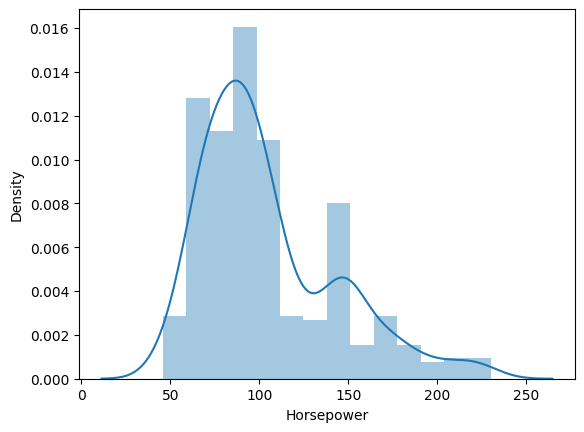

In [12]:
sns.distplot(data.Horsepower)  #mean degeri 104 idi eksik degerleri doldurduktan sonra bir sıkıntı gozukmuyor.

EDA(Exploratory Data Analysis) EDA, bir veri kümesini incelemek, özelliklerini anlamak ve veri setindeki temel özellikleri ortaya çıkarmak amacıyla kullanılan bir veri madenciliği aşaması.
EDA süreci genellikle istatistiksel yöntemler, grafiksel gösterimler (histogramlar, scatter plotlar, kutu grafikleri vb.) ve diğer veri görselleştirme araçları kullanılarak gerçekleştirilir. Bu aşama, veri madenciliği projelerinin başlangıcında önemlidir, çünkü veri setini anlamak ve veri kalitesini değerlendirmek, daha sonraki aşamalarda daha etkili ve doğru modeller oluşturmanıza yardımcı olabilir.

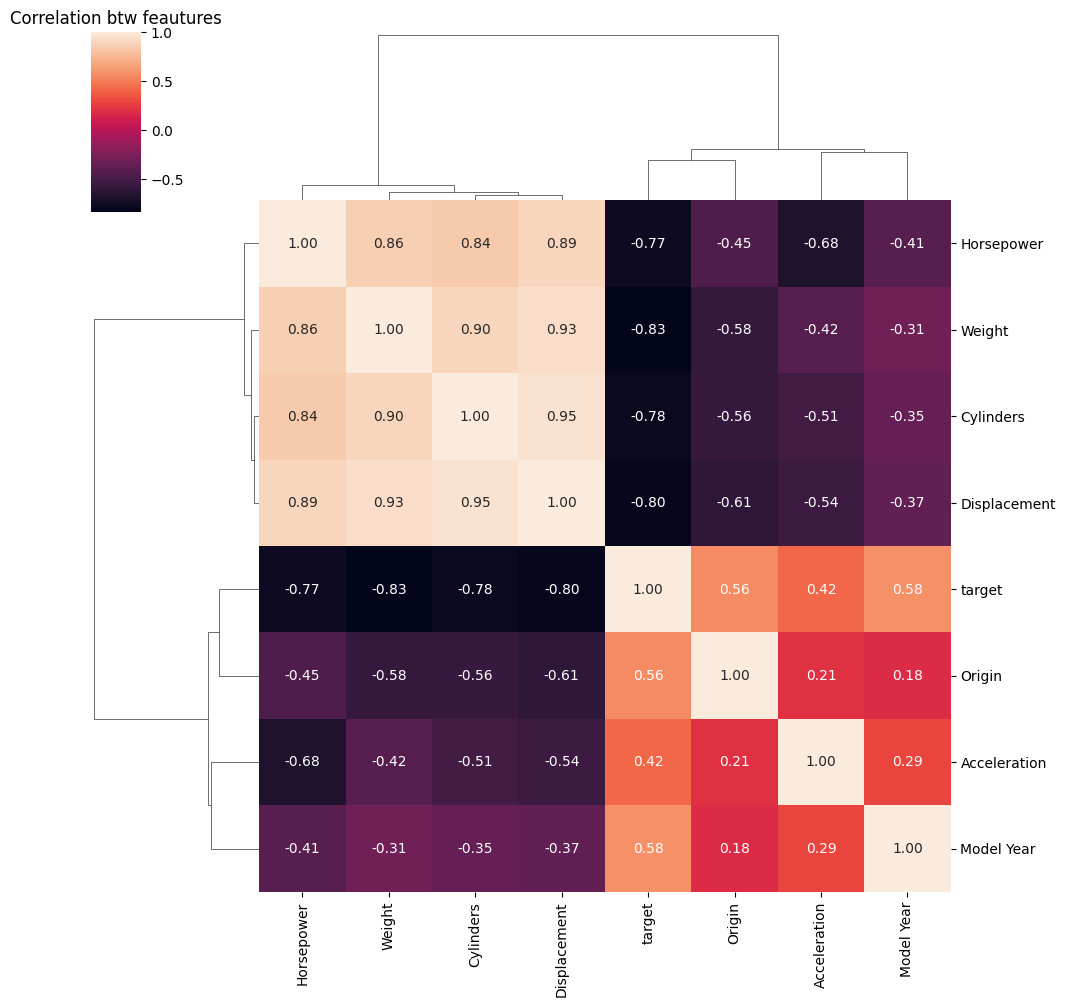

In [13]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation btw feautures")
plt.show()

target bizim diğer verilere dependent verimiz. Target dısındakiler independent verilerimiz.
Beygir gucu, aracın agırlıgı, silindir sayısı ve motor inisi arasında pozitif bir korelasyon var. Hızlanma ve ağırlık arasında ters orantı var


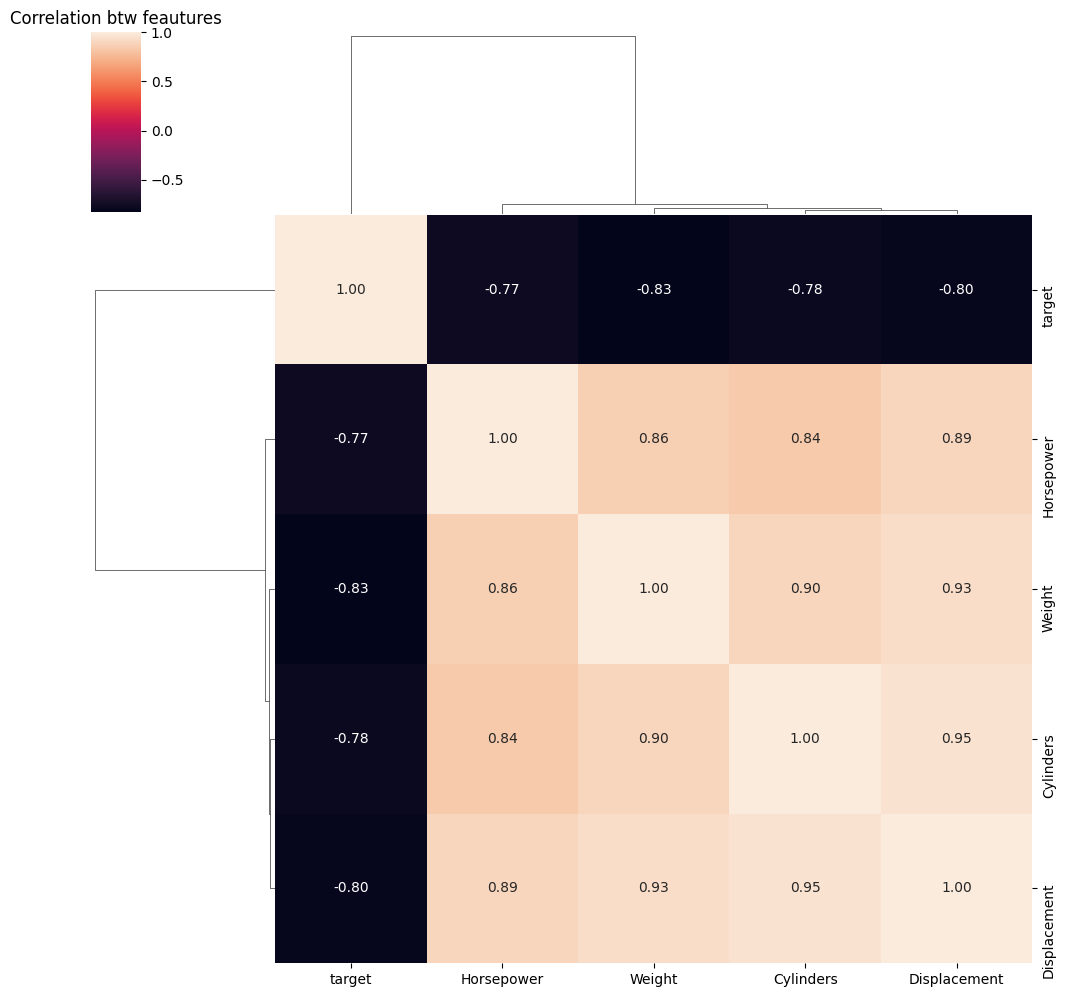

In [14]:
threshold=0.75 #0.75 + veya - olabilir
filtre=np.abs(corr_matrix["target"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(),annot = True, fmt=".2f")
plt.title("Correlation btw feautures")
plt.show()

Birbirleri ile yuksek ilişkiye sahip iliskiye sahip feauterlar var ise bu feauterlar birbirleri ile eş düzlemdir diyoruz. Yani malticollinearity var diyoruz bu bir dezavantajdır. Çünkü 1 feautire kullanmak yerine 5 tane feauture aynı seyi söylüyor ise modeli yanlış yönlendirebilir. Burada da var.

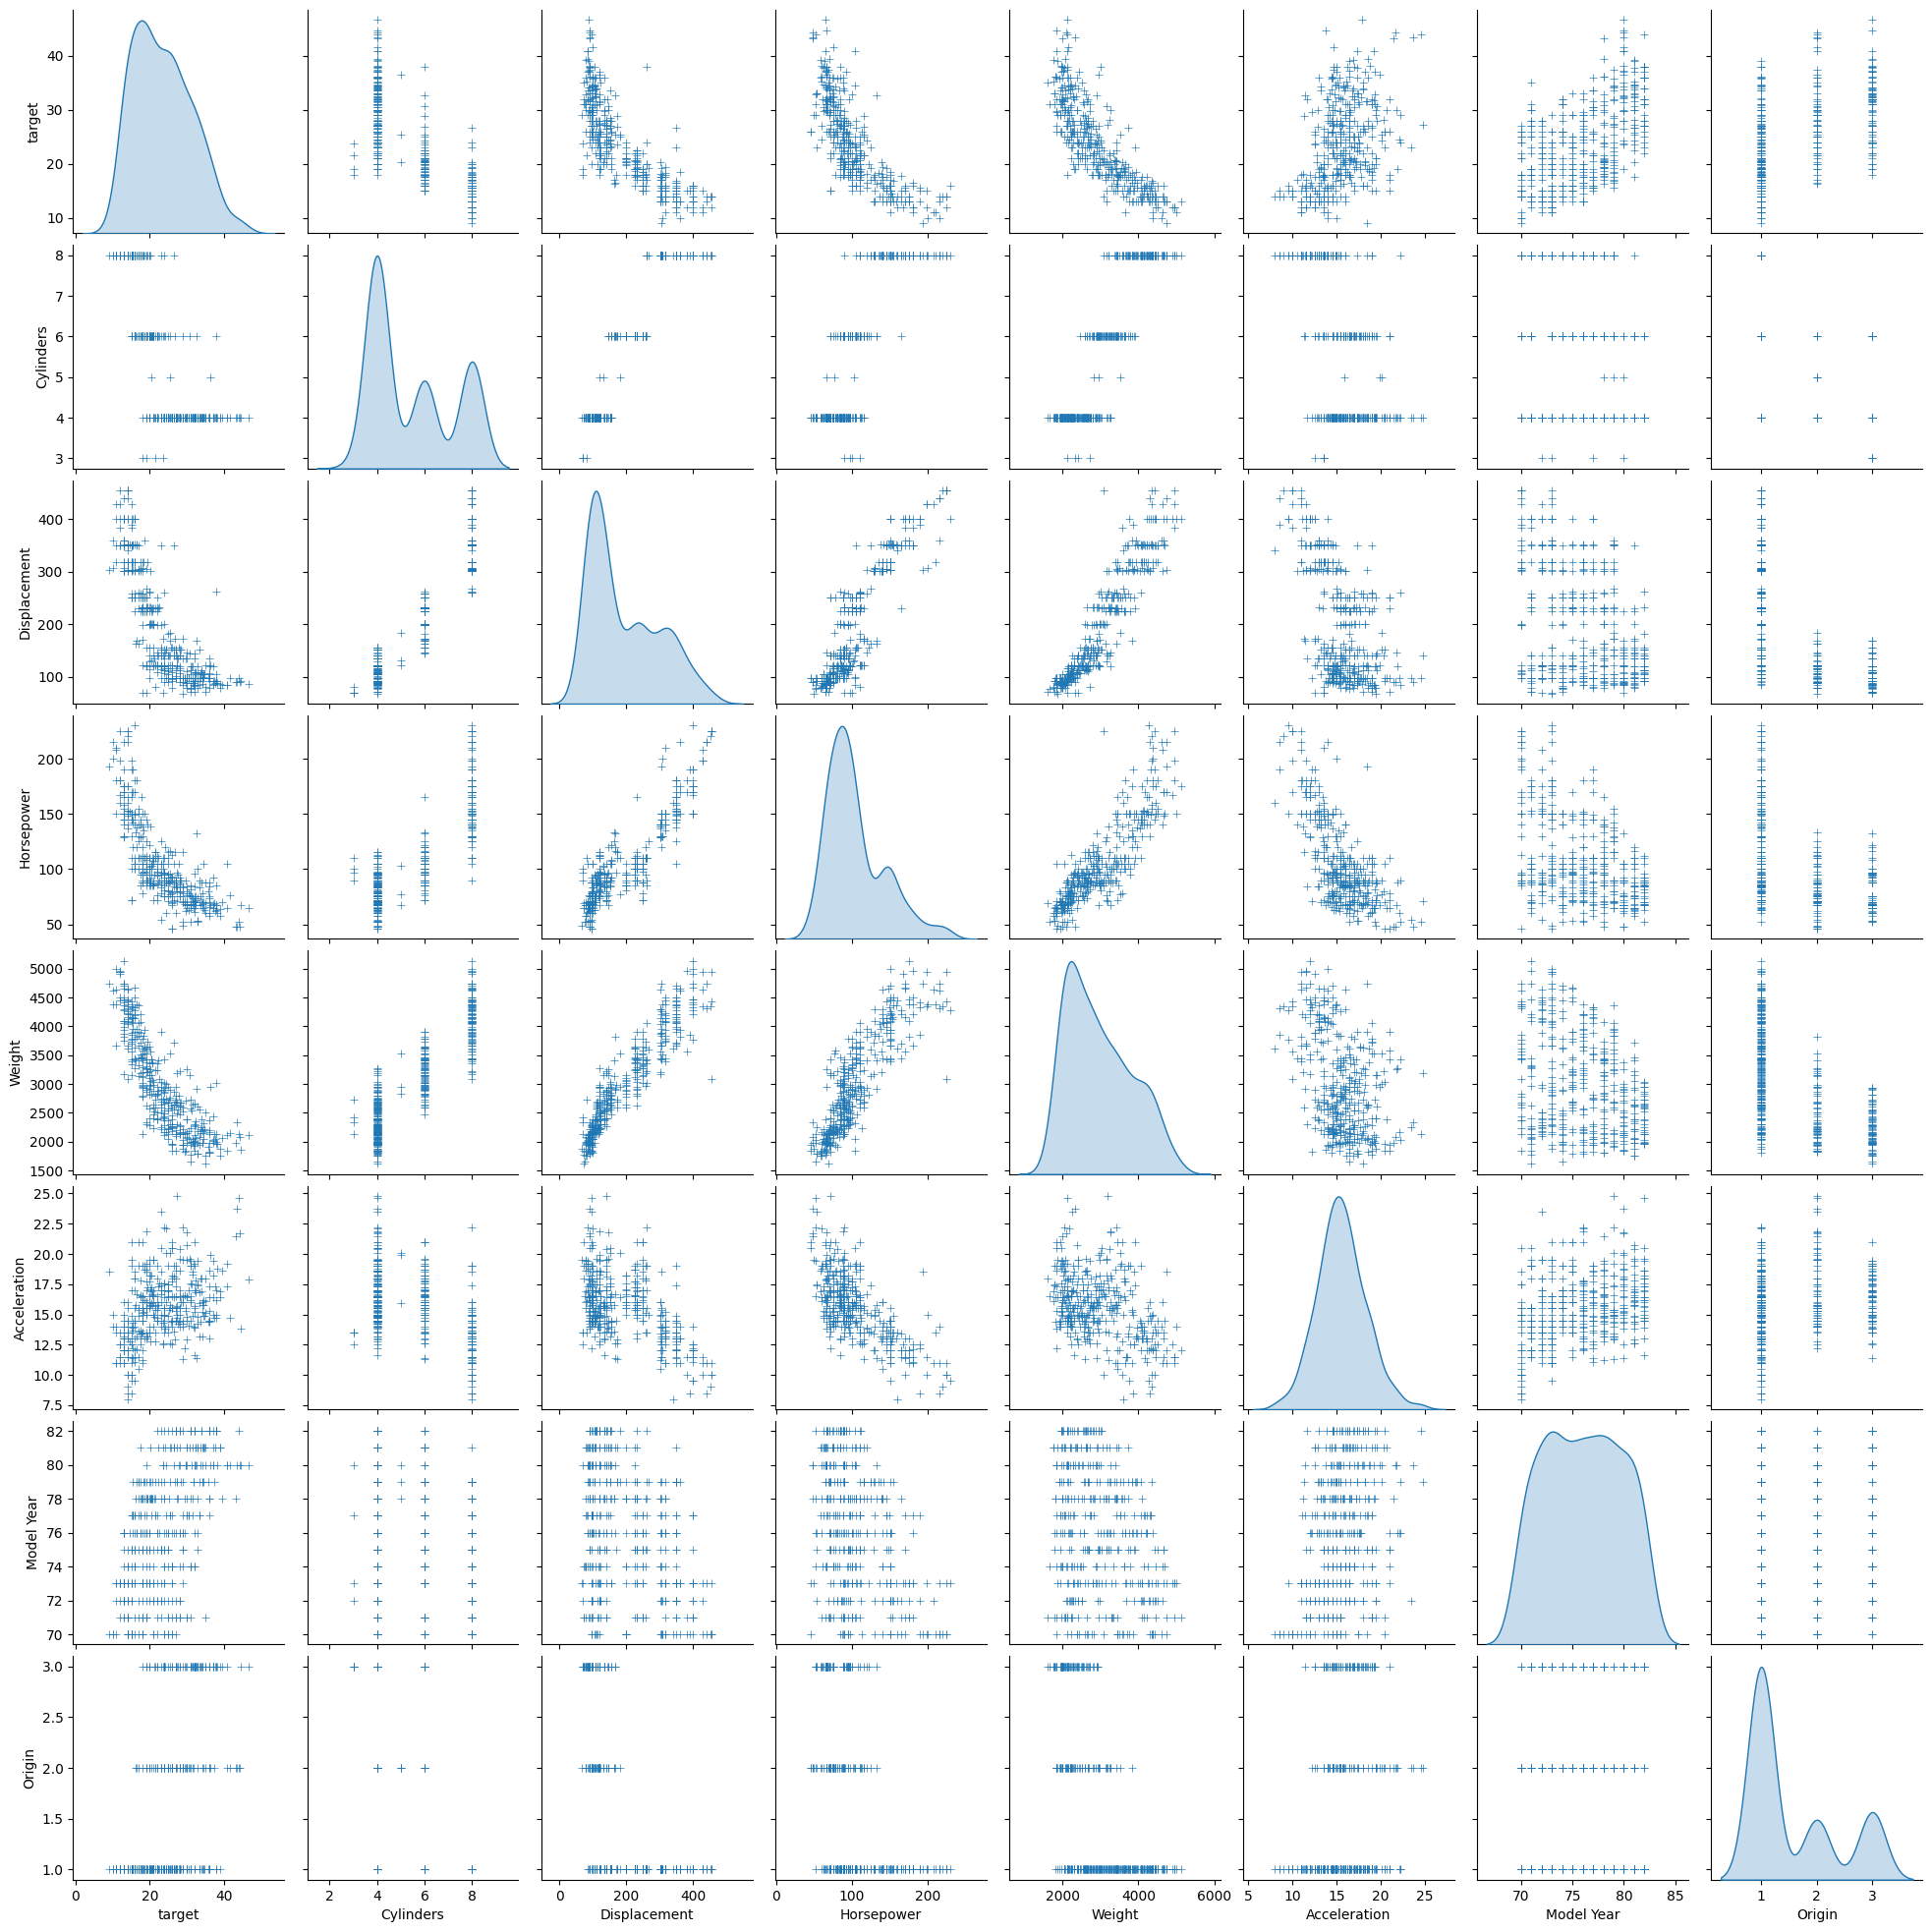

In [15]:
sns.pairplot(data, diag_kind="kde", markers ="+") #histogram olarak düşünebiliriz.
plt.show()

1. Targetin targetla olan iliskisinde histogram ortaya cıktı ve saga dogru uzayan kuyruk var pozitif.
2. Target ile silindir arasındaki iliski silindir 4-6-8 olmak üzere kategorik veri var. **Silindirleri feautire extractionda kullanabiliriz**
3. Acceleration ve model yearın target ile bir korelesyonu bukunmuyor.
4. Origin de kategorik veri olarak alınabilir. **Feauture extractionda kullanılabilir.**
5.* Displacement ve weigh arasında outliner veriler bulunmakta bunlar temizlenmeli*


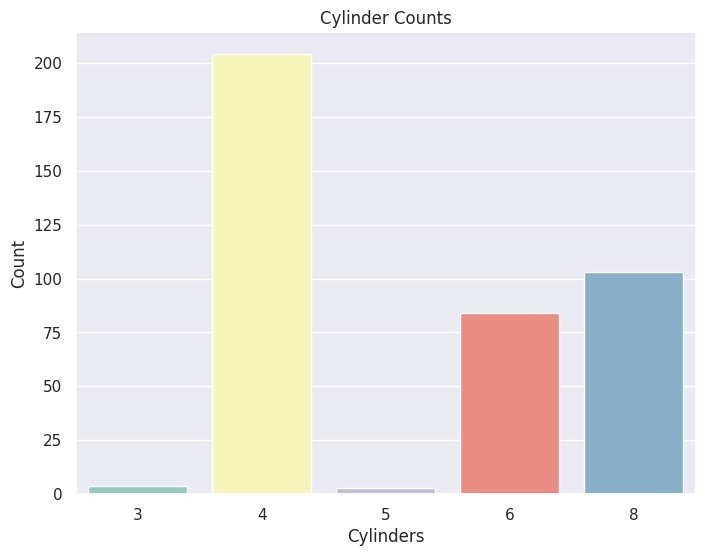

In [16]:
sns.set(style="darkgrid")

plt.figure(figsize=(8, 6))
sns.countplot(x="Cylinders", data=data, palette="Set3")  # countplot kullanarak çubuk grafiği çiz

plt.title("Cylinder Counts")
plt.xlabel("Cylinders")
plt.ylabel("Count")

plt.show()

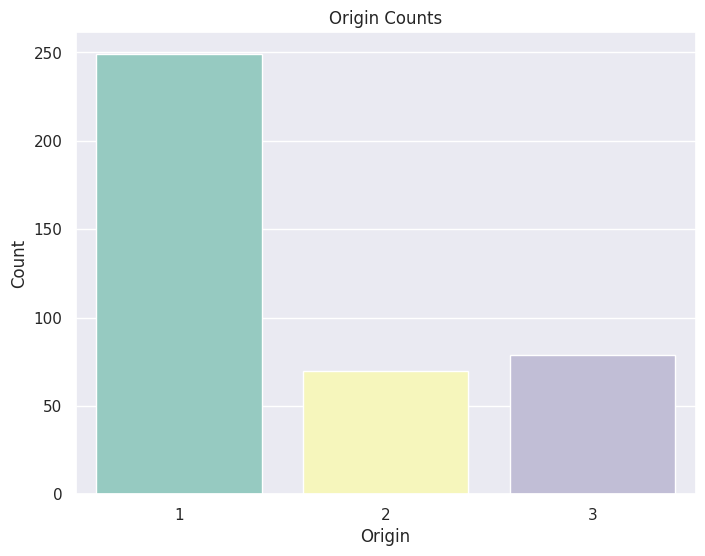

In [17]:
sns.set(style="darkgrid")

plt.figure(figsize=(8, 6))
sns.countplot(x="Origin", data=data, palette="Set3")  # countplot kullanarak çubuk grafiği cizilir.

plt.title("Origin Counts")
plt.xlabel("Origin")
plt.ylabel("Count")

plt.show() #Avrupa Amerika Japonya Feauture Engennering uygulayacagız

Outlinear için cizim yapalım

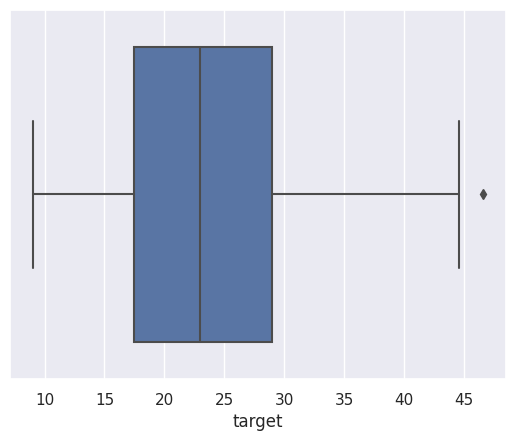

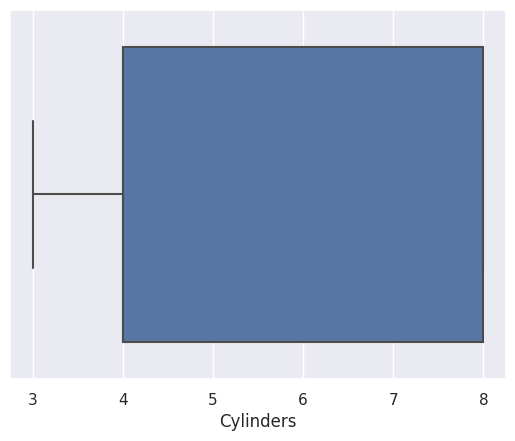

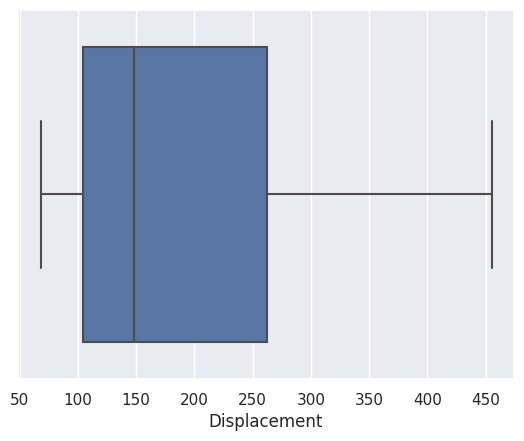

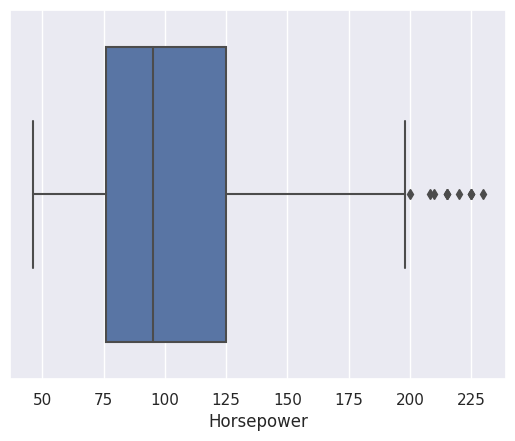

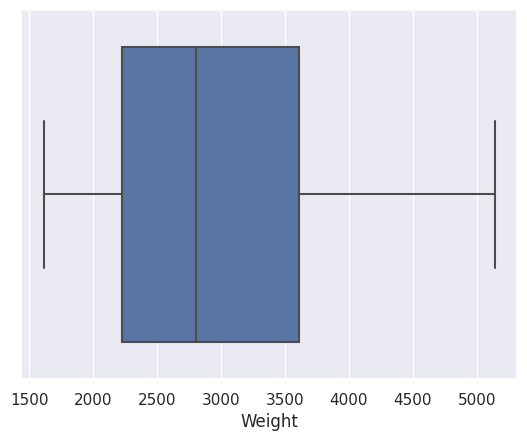

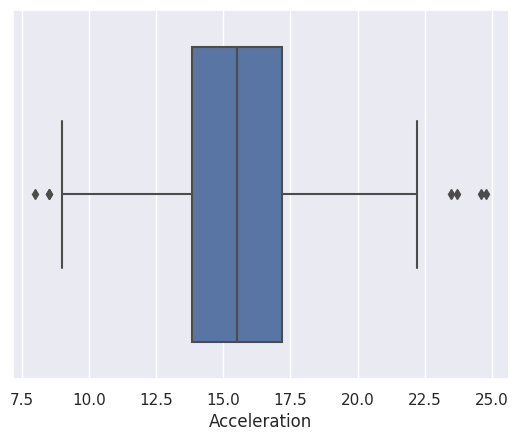

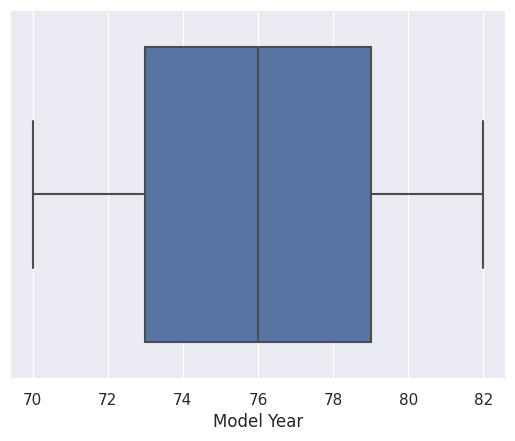

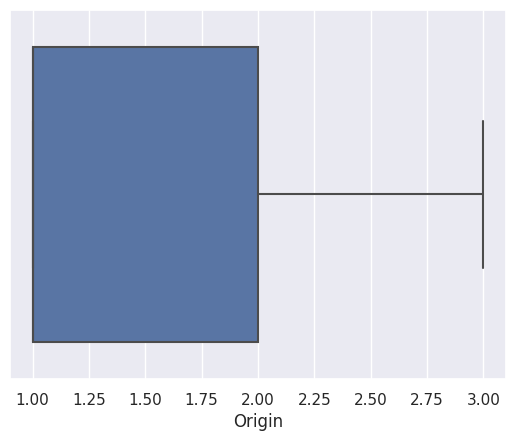

In [18]:
for c in data.columns:
  plt.figure()
  sns.boxplot(x=c, data = data , orient="v") #v=verticial

Target, Horsepower, Acceleration da aykırı veriler bulunmakta.

In [20]:
thr=2
horsepower_desc= describe["Horsepower"]
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]
IQR_hp = q3_hp-q1_hp
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp
filter_hp_bottom = bottom_limit_hp < data["Horsepower"]
filter_hp_top = data["Horsepower"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top

datas = data[filter_hp] #horsepowerda olan aykırılıkları temizledik aynısını accleration icin de yapacagız

thr=2
acceleration_desc= describe["Acceleration"]
q3_ac = acceleration_desc[6]
q1_ac = acceleration_desc[4]
IQR_ac = q3_ac-q1_ac
top_limit_ac = q3_ac + thr*IQR_ac
bottom_limit_ac = q1_ac - thr*IQR_ac
filter_ac_bottom = bottom_limit_ac < data["Acceleration"]
filter_ac_top = data["Acceleration"] < top_limit_ac
filter_ac = filter_ac_bottom & filter_ac_top

data = data[filter_ac] #Acceleration da olan aykırı veriler de temizlendi

remaining_data_count = len(data)
print(f"Geriye kalan veri sayısı: {remaining_data_count}")


Geriye kalan veri sayısı: 396


Future Enginnering
Skewness verinin içinde bulunan dependent ve independıt verilerin skewness degerlerine bakacağız.

<Axes: xlabel='target', ylabel='Density'>

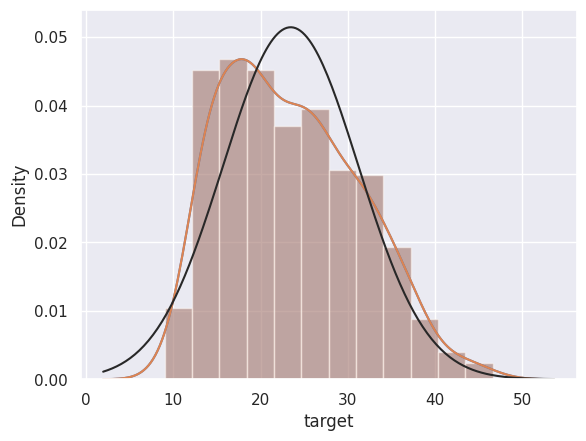

In [21]:
#target dependent variable
sns.distplot(data.target)  #kuyruk saga dogru pozitif skewness var sola dogru toplanma soz konusu  normal dagılımla karsılastırmak ıcın
sns.distplot(data.target , fit= norm)

<Axes: xlabel='target', ylabel='Density'>

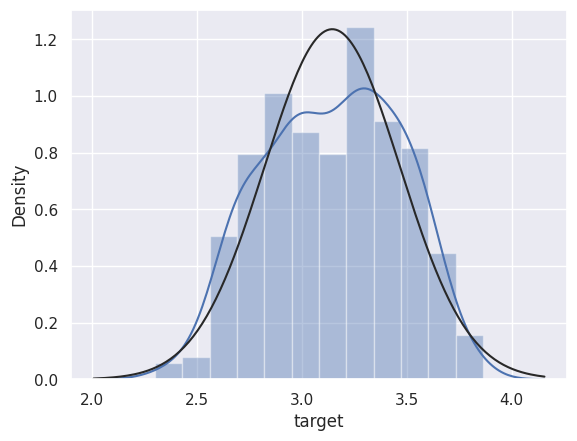

In [22]:
#carpıklıgı duzenlemek en aza indirgemek icin log transfer
data["target"] = np.log1p(data["target"])
plt.figure()
sns.distplot(data.target , fit= norm)

Skewns degerleri daha birbirine yakın hale getirdik carpıklıgı azalttık. Model daha iyi olacak.

Independent variable icin future engineering kontrol sonucu tolere edilebilir bir deger cıkmıstır bu projede yer vermedim.

In [23]:
#one hot encoder (categorik veriler modeli bozar bu sebepten)



data["Cylinders"] = data["Cylinders"].astype(str)

data["Origin"] = data["Origin"].astype(str)

data= pd.get_dummies(data)


Hold out & Standardization

In [24]:
#split
x = data.drop(["target"], axis=1)
y=data.target

test_size=0.4
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = test_size, random_state=0)


#Standardization
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Regression Models

In [25]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
print("Lr Coef:", lr.coef_) #coef : regresyon katsayısı bagımlı ve bagımsız degiskenler arasindaki iliskiyi bulmada onemli
y_predicted_dummy = lr.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Linear Regression MSE:", mse)

Lr Coef: [ 0.05800618 -0.09358949 -0.173742   -0.00100288  0.10170934 -0.02229916
  0.02587853 -0.00355586 -0.02110355 -0.00292734 -0.02134777  0.00837984
  0.01791858]
Linear Regression MSE: 0.013456363600011274


Regulasyon uygulayacacız
sectiklerim *`Ridge, Lasso,Elastic`*
**Regulasyon avantaj:**
1- Overfitting onleme en iyi yapan ridge
2-Daha iyi genelleme yapması
3-Gorunmeyen verilere daha iyi uyum saglama
4-Daha guvenilir tahminler yapma

In [26]:
#1- Ridge Regression

ridge= Ridge(random_state=42, max_iter=10000) #10000 fazla ama yapacagı max fitting

alphas = np.logspace(-4, -0.5,30)       # ridgede en iyi paramatre secimi icin gridsearch kullanacagız yani bize belirli aralıklarda gezerek en iyi kombinasyonu getirecek ridge formulunde yer alan alpa degerini en iyi seviyeye getirecegiz
tuned_parameters = [{'alpha': alphas}]

n_folds= 5

clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit=True)  #true olmazsa clf test edemeyiz.clf en iyi paremetreleri kullanarak test edecek.
clf.fit(X_train, Y_train)

scores = clf.cv_results_["mean_test_score"]

print("Ridge Coef: ",clf.best_estimator_.coef_)

ridge = clf.best_estimator_
print("Ridge Best Estimator: ", ridge)

y_predicted_dummy = clf.predict(X_test)

mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge MSE: ",mse)


Ridge Coef:  [ 0.05390146 -0.09316059 -0.17125108 -0.00133463  0.1014438  -0.02266514
  0.02551602 -0.00361073 -0.02110258 -0.00241224 -0.02111224  0.00813982
  0.01786087]
Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Ridge MSE:  0.013459461971289333


Burada kucuk de olsa mse de basarım sagladı ridge regresyonu: :D

In [27]:
#2- Lasso Regression
#lasso-rich farkı feauture selection yönteminde kullanılabilir. Gereksiz featurlara coeflere 0 atanır. Ama rich de 0.00001 yappılıyordu.Eğer 0 görüyorsak lassoda
#etkisi yok demektir. Eğer corelation degerlerimiz varsa ki bizde vardı lasso sadece 1 tanesini alıyor en önemlisini alıp digerlerine 0 yazıyor.
#Overfittingi onluyor rich gibi.
lasso= Lasso(random_state=0, max_iter=10000) #10000 fazla ama yapacagı max fitting

alphas = np.logspace(-4, -0.5,30)       # lassoda en iyi paramatre secimi icin gridsearch kullanacagız yani bize belirli aralıklarda gezerek en iyi kombinasyonu getirecek lasso formulunde yer alan alpa degerini en iyi seviyeye getirecegiz
tuned_parameters = [{'alpha': alphas}]  #alpha hiperparametre secilmesi lazımm

n_folds= 5

clf = GridSearchCV(lasso, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit=True)  #true olmazsa clf test edemeyiz.clf en iyi paremetreleri kullanarak test edecek.
clf.fit(X_train, Y_train)

scores = clf.cv_results_["mean_test_score"]

print("Lasso Coef: ",clf.best_estimator_.coef_)

lasso = clf.best_estimator_
print("Lasso Best Estimator: ", lasso)

y_predicted_dummy = clf.predict(X_test)  #gridsearch ve en iyi degerleri alarak x testi degerlendiriyoruz

mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Lasso MSE: ",mse)

Lasso Coef:  [ 0.         -0.07215514 -0.15522098 -0.          0.09809476 -0.02573039
  0.01339743 -0.00189464 -0.02234931  0.         -0.02115838  0.
  0.00888684]
Lasso Best Estimator:  Lasso(alpha=0.0028072162039411755, max_iter=10000, random_state=0)
Lasso MSE:  0.013281884741606435


MSE de basarımımız arttı. 0 lar var ridge de yoktu gereksiz feauturları 0 aldı. Suana kadar ki en iyi sonucu aldık lasso sayesinde

In [28]:
#ElasticNet: Son regularization teknigi sonucu minimize etmeye yarıyor. Lasso ve ridge karısımı diye düsünebiliriz her ikisininde kuvvetli ypnlerini alıyor.
#Corelasyon verilerin azaltılmasında, cıkarılmasında kullanılıyor..

parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)
                  }
eNet = ElasticNet(random_state=0, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid ,cv = n_folds, scoring = "neg_mean_squared_error", refit=True )
clf.fit(X_train, Y_train)

print("ElasticNet Coef: ", clf.best_estimator_.coef_)
print("ElasticNet Best Estimator:" , clf.best_estimator_)

y_predicted_dummy = clf.predict(X_test)  #gridsearch ve en iyi degerleri alarak x testi degerlendiriyoruz

mse = mean_squared_error(Y_test, y_predicted_dummy)
print("ElasticNet MSE: ",mse)


ElasticNet Coef:  [ 0.         -0.07186831 -0.15430537 -0.          0.09782843 -0.02518909
  0.01483498 -0.00152269 -0.02155923  0.         -0.02093673  0.
  0.00890647]
ElasticNet Best Estimator: ElasticNet(alpha=0.0037065129109221566, l1_ratio=0.8, max_iter=10000,
           random_state=0)
ElasticNet MSE:  0.013276628727630352
